# Project description

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.

One of the most common problems gyms and other services face is customer churn.

In order to fight churn, this project comes to analyze customer profiles, in order to come up with a customer retention strategy.

# Description of the data

•	'Churn' — the fact of churn for the month in question

User data for the preceding month:

•	'gender'

•	'Near_Location' — whether the user lives or works in the neighborhood where the gym is located

•	'Partner' — whether the user is an employee of a partner company (the gym has partner companies whose employees get   
     discounts; in those cases the gym stores information on customers' employers)
     
•	Promo_friends — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code 
    when paying for their first membership)
    
•	'Phone' — whether the user provided their phone number

•	'Age'

•	'Lifetime' — the time (in months) since the customer first came to the gym

Data from the log of visits and purchases and data on current membership status:

•	'Contract_period' — 1 month, 3 months, 6 months, or 1 year

•	'Month_to_end_contract' — the months remaining until the contract expires

•	'Group_visits' — whether the user takes part in group sessions

•	'Avg_class_frequency_total' — average frequency of visits per week over the customer's lifetime

•	'Avg_class_frequency_current_month' — average frequency of visits per week over the preceding month

•	'Avg_additional_charges_total' — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, 
     massages, etc.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import numpy as np
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import sidetable
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
try:
    gym =pd.read_csv('C:/Users/ASUS/OneDrive/Desktop/projects files/gym_churn_us.csv')    

except:
    gym = pd.read_csv('/datasets/gym_churn_us.csv') 

In [3]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
gym.sample(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
2679,1,1,0,0,1,12,1,29,112.262630,12.0,11,4.147937,4.257203,0
1930,1,1,0,0,1,1,0,35,316.041723,1.0,8,3.038233,3.019853,0
743,1,1,1,0,1,1,0,27,227.485869,1.0,1,3.113239,3.157370,0
3550,1,1,0,0,1,1,1,28,246.211553,1.0,1,0.822003,0.000000,1
63,1,1,0,0,1,1,0,28,42.160809,1.0,1,0.425011,0.605247,1
2386,1,1,0,0,1,1,0,28,101.037368,1.0,1,2.656634,2.865543,0
3647,1,1,0,0,1,1,1,26,148.434052,1.0,2,2.955503,2.889211,0
2956,1,1,1,0,1,1,1,31,50.433754,1.0,5,1.723426,0.980235,1
1652,0,1,0,0,1,1,0,34,73.610502,1.0,6,2.772606,2.886870,0
1315,1,1,0,0,1,12,1,31,293.950465,11.0,12,2.000912,1.911063,0


# Exploratory data analysis (EDA)

In [5]:
gym.stb.missing(style=True)

,missing,total,percent
gender,0,"4,000",0.00%
Near_Location,0,"4,000",0.00%
Partner,0,"4,000",0.00%
Promo_friends,0,"4,000",0.00%
Phone,0,"4,000",0.00%
Contract_period,0,"4,000",0.00%
Group_visits,0,"4,000",0.00%
Age,0,"4,000",0.00%
Avg_additional_charges_total,0,"4,000",0.00%
Month_to_end_contract,0,"4,000",0.00%


In [6]:
gym.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


#### mean feature values in two groups: for those who left (churn) and for those who stayed

In [7]:
churn=gym[gym.Churn==1]
n_churn=gym[gym.Churn==0]
churn.describe().T
n_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,1061.0,0.510839,0.500118,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,1061.0,0.768143,0.422217,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,1061.0,0.355325,0.478837,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,1061.0,0.183789,0.387495,0.000000,0.000000,0.000000,0.000000,1.000000
Phone,1061.0,0.902922,0.296204,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,1061.0,1.728558,2.132371,1.000000,1.000000,1.000000,1.000000,12.000000
Group_visits,1061.0,0.268615,0.443448,0.000000,0.000000,0.000000,1.000000,1.000000
Age,1061.0,26.989632,2.895163,18.000000,25.000000,27.000000,29.000000,38.000000
Avg_additional_charges_total,1061.0,115.082899,77.696419,0.148205,50.629127,103.814686,165.616858,425.535220
Month_to_end_contract,1061.0,1.662582,1.964593,1.000000,1.000000,1.000000,1.000000,12.000000


,count,mean,std,min,25%,50%,75%,max
gender,2939.0,0.510037,0.499984,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,2939.0,0.873086,0.332933,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,2939.0,0.534195,0.498914,0.000000,0.000000,1.000000,1.000000,1.000000
Promo_friends,2939.0,0.353522,0.478144,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,2939.0,0.903709,0.295040,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,2939.0,5.747193,4.716942,1.000000,1.000000,6.000000,12.000000,12.000000
Group_visits,2939.0,0.464103,0.498795,0.000000,0.000000,0.000000,1.000000,1.000000
Age,2939.0,29.976523,3.009933,19.000000,28.000000,30.000000,32.000000,41.000000
Avg_additional_charges_total,2939.0,158.445715,99.801599,0.171862,76.920993,149.881171,224.448274,552.590740
Month_to_end_contract,2939.0,5.283089,4.363522,1.000000,1.000000,6.000000,10.000000,12.000000


#### histograms and feature distributions for those who left (churn) and those who stayed.

In [8]:
def distribution(df,parameter):
    fig = px.histogram(df, x=parameter,color='Churn',title=print('The histogram of: {}'.format(parameter)))
    fig.show("png");
    print()
    print()
    
def bar(parameter):
    sns.catplot(x=parameter, col="Churn",
                data=gym, kind="count",
                height=4, aspect=1.3)

histograms for numerical features
------------------------------------------------------------------

The histogram of: Age


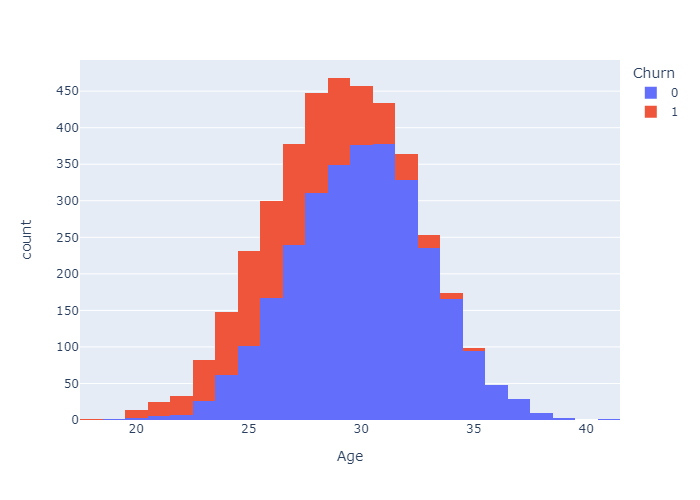



The histogram of: Lifetime


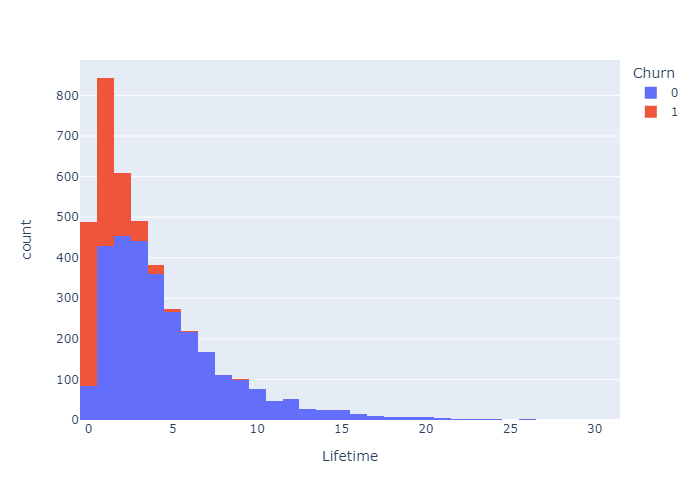



The histogram of: Avg_additional_charges_total


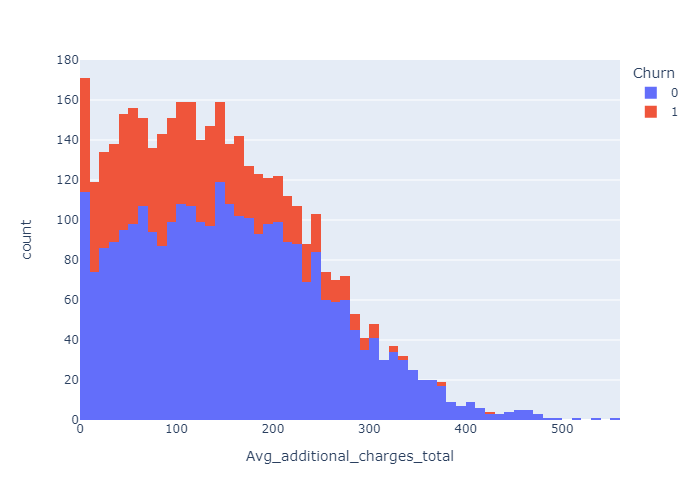



The histogram of: Avg_class_frequency_total


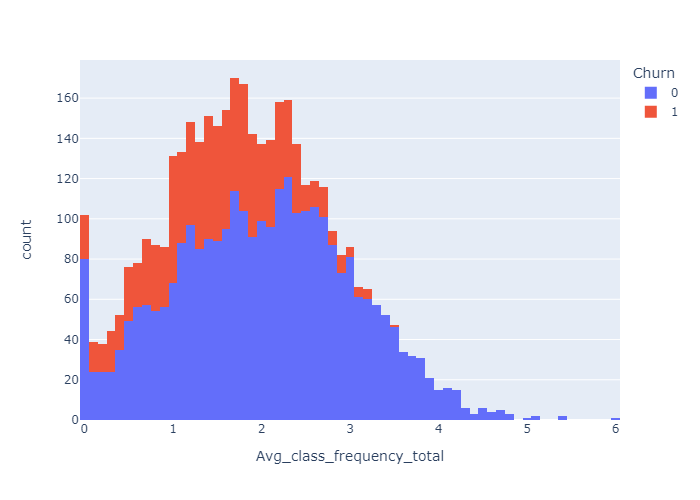



The histogram of: Avg_class_frequency_current_month


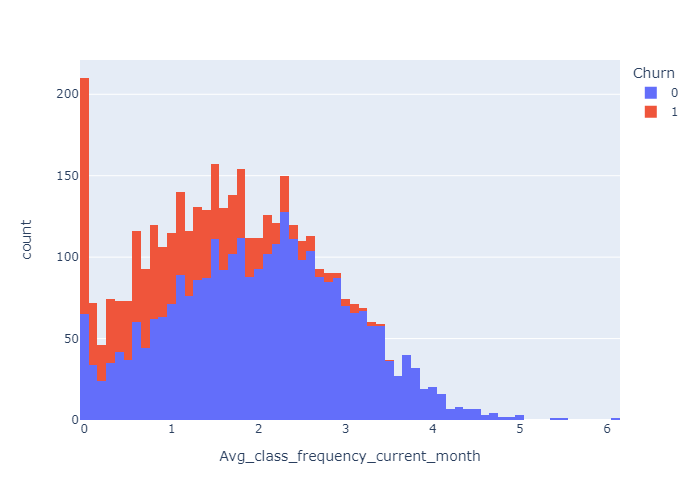

In [9]:
print('histograms for numerical features')
print('------------------------------------------------------------------')
print()
features=['Age','Lifetime','Avg_additional_charges_total','Avg_class_frequency_total','Avg_class_frequency_current_month']
cat=['Contract_period','Month_to_end_contract','gender','Near_Location','Partner','Promo_friends','Phone','Group_visits']
for i in features:
    distribution(gym,i)

bar charts for categorical features
------------------------------------------------------------------



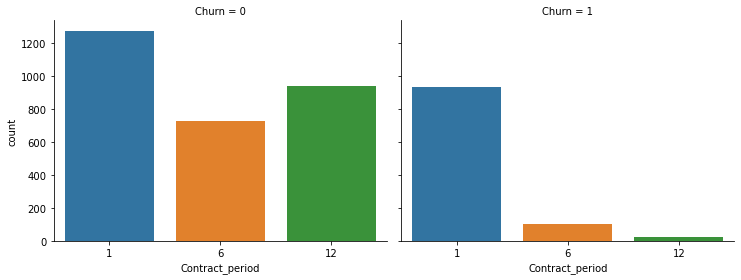

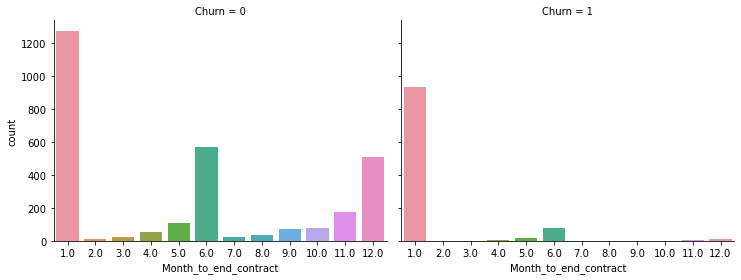

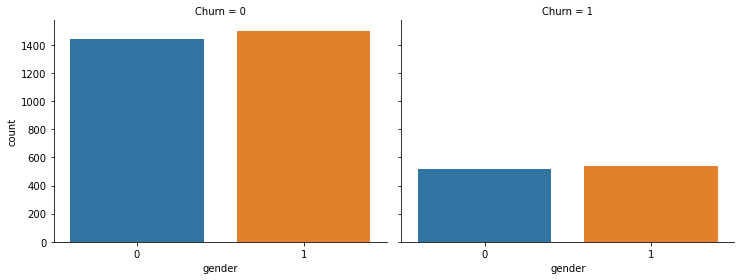

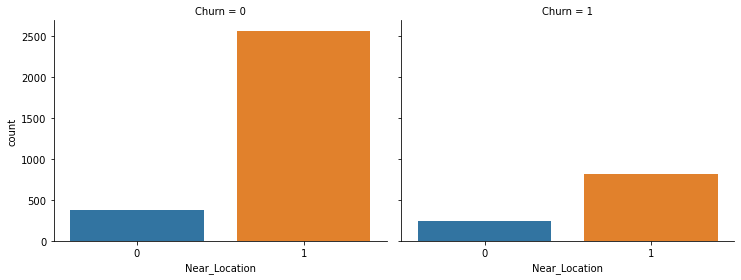

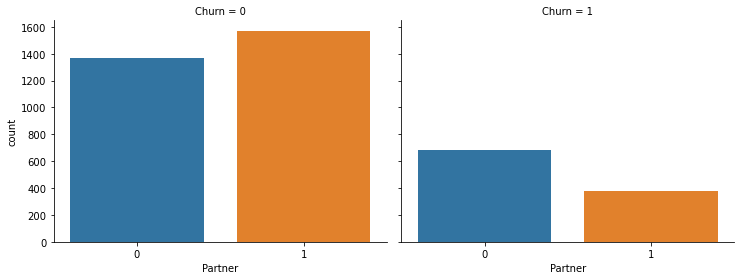

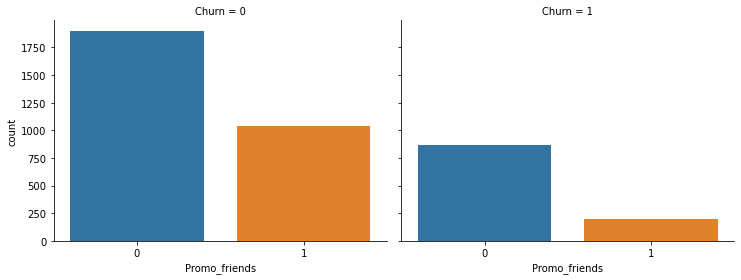

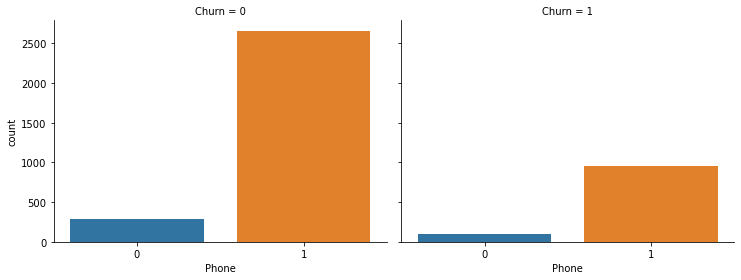

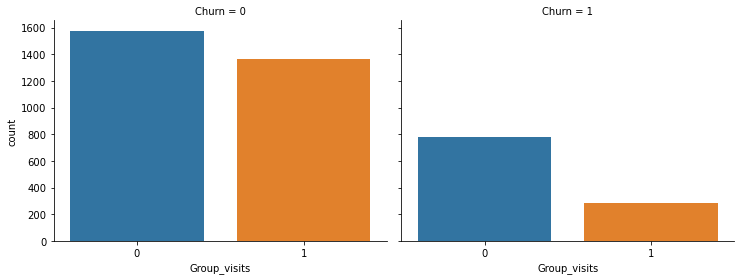

In [10]:
print('bar charts for categorical features')
print('------------------------------------------------------------------')
print()
for i in cat:
    bar(i)

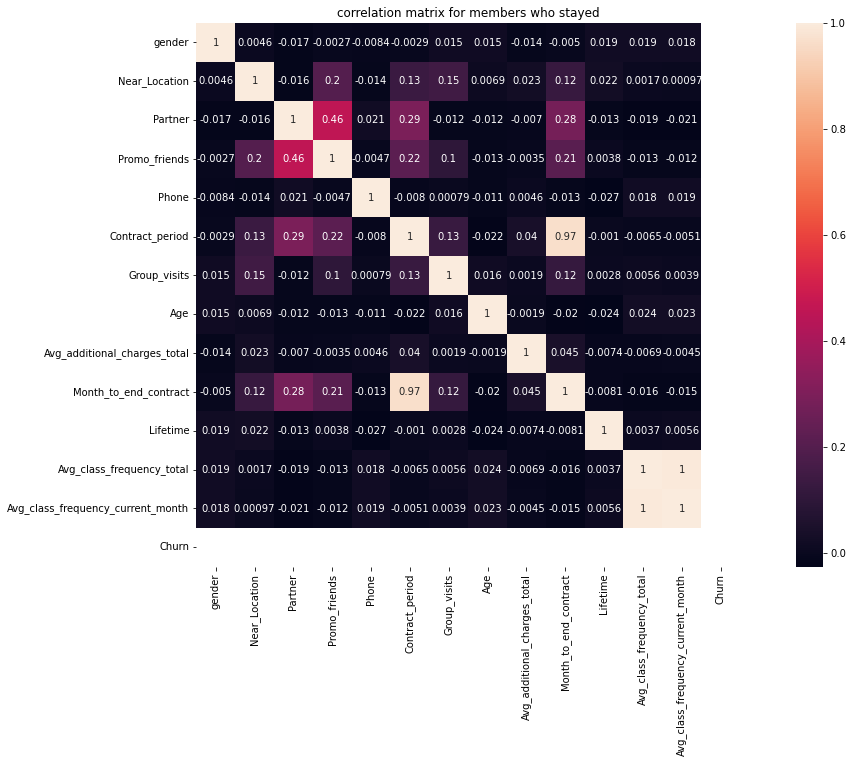

In [11]:
n_churn_matrix=n_churn.corr()
plt.figure(figsize=(20,10))
sns.heatmap(n_churn_matrix, annot = True, square=True)
plt.title('correlation matrix for members who stayed')
plt.show();

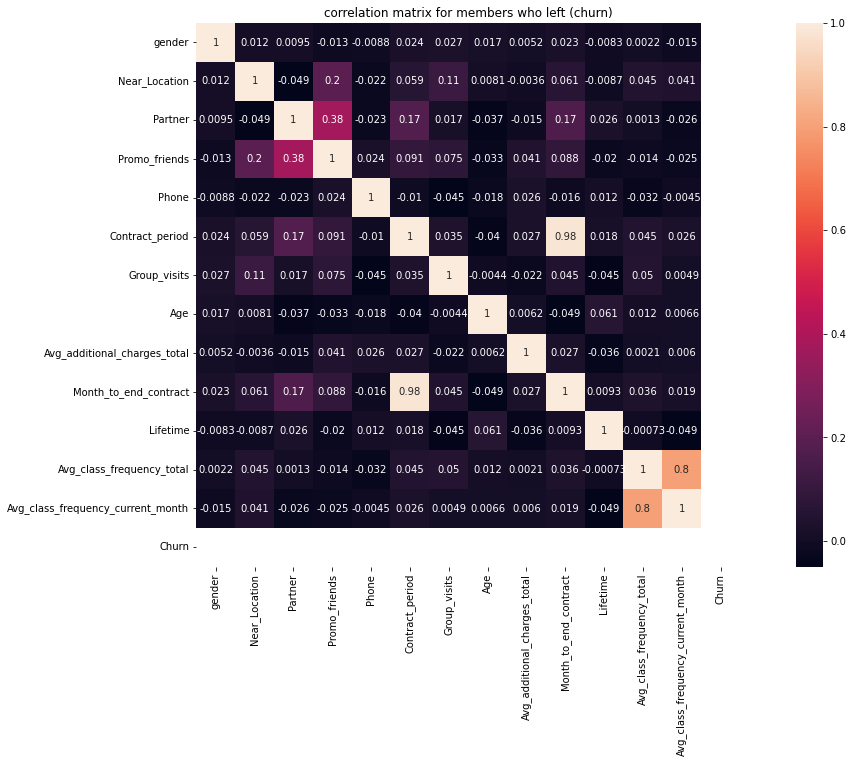

In [12]:
churn_matrix=churn.corr()
plt.figure(figsize=(20,10))
sns.heatmap(churn_matrix, annot = True, square=True)
plt.title('correlation matrix for members who left (churn)')
plt.show();

# Exploratory data analysis (EDA) conclusion

We can see that our clients split to 1061 clients who left (churn) and 2939 clients who stayed.

When we look on the different features between this two groups we can see that the distrubtion of the numrical features is quite similar between the groups ,but with higher frequency on the lower values of the different numrical features for the churn group. 

On the categorial features we can see difference in some features between the groups. the churn group has less spread values over the contact period time with mostly all clients on 1 month. we can see also the same pattern on the "month to end contract" feature.

When we look on the correlation matrix we can see a strong correlation between the "Contract period" and "Month to end contract" features what make sense because they are similar features what dont tell us much. we can also see strong correlation between "Avg_class_frequency_current_month" and "Avg_class_frequency_total" with stronger correlation in the non churn group.

When we look on the average values differnce between the groups we can see some intersting details.  

We can see that the clients who left are younger (26.98 years Vs 29.97 years), have signifly less lifetime in the gym (0.99 years Vs 4.71 years), less time in contract time period (1.72 years Vs 5.74 years), and spending less time and money in the gym (average of 1.47 visits Vs 2.02 visits and average additional charges of 115 dollars Vs 158 dollars).

The clients who stays are most likely takes part in group sessions, originally signed up through a "bring a friend" offer, and is an employee of a partner company who get discount.

For conclusion we can see some very important patterns that define the clients who left and those who stayed, that can help us decide which features we need to take into account, in order to come up with a better customer retention strategy.

# Building a model to predict user churn

In [13]:
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [14]:
# divide the data into features (the X matrix) and a target variable (y)
X = gym.drop('Churn', axis = 1)
y = gym['Churn']

# divide the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# train StandardScaler on the train set
scaler = StandardScaler()
scaler.fit(X_train)
# transform train and test sets
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# define the model's algorithm 
lr_model = LogisticRegression(random_state=0)

# train the model
lr_model.fit(X_train_st, y_train)

# use the trained model to make forecasts
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

# binary prediction
lr_predictions = lr_model.predict(X_test_st)

# print the studied metrics for the resulting prediction
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Metrics for logistic regression:')

# define the algorithm for the new random forest model
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
# train the random forest model
rf_model.fit(X_train, y_train)
# use the trained model to make predictions
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:,1]
# print all metrics
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Metrics for random forest:')

StandardScaler()

LogisticRegression(random_state=0)

Metrics for logistic regression:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
	ROC_AUC: 0.97


RandomForestClassifier(random_state=0)

Metrics for random forest:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82
	ROC_AUC: 0.97


# Model to predict user churn conclusion

When we evaluate accuracy, precision, and recall for both models using the validation data, in order to compare the models, 

We can see the Logistic Regression model gave a bit better results in almost any parameter, and it more fit for our data.

# Create user clusters

In [15]:
cluster=gym.drop('Churn',axis=1)
cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

#### Building a matrix of distances based on the standardized feature matrix and plotting a dendrogram

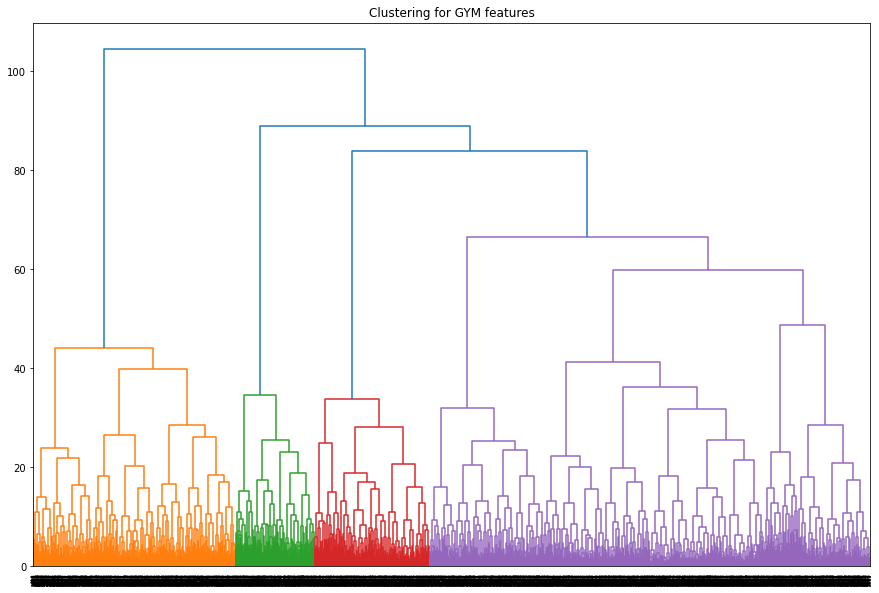

In [16]:
sc = StandardScaler()
X_sc = sc.fit_transform(cluster)
linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Clustering for GYM features')
plt.show();

#### Train the clustering model with the K-means algorithm

In [17]:
# define the k_means model 
km = KMeans(n_clusters = 5,random_state=0)
# predict the clusters for observations 
labels = km.fit_predict(X_sc)
gym['cluster'] = labels


#### Mean feature values by cluster


In [18]:
gym.groupby(['cluster']).mean().T


cluster,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
Near_Location,0.959406,0.862338,0.000000,1.000000,0.976134
Partner,0.783168,0.470130,0.463366,0.350238,0.356802
Promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
Phone,1.000000,0.000000,1.000000,1.000000,0.998807
Contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
Group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
Age,29.982178,29.301299,28.477228,28.167987,30.125298
Avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
Month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


#### Distributions of features by clusters

In [19]:
def distribution_cluster(parameter):
    fig = px.histogram(gym, x=parameter,color="cluster",pattern_shape="Churn", title=parameter)
    fig.show("png");
    print()
    print()

def bar_cluster(parameter):
    sns.catplot(x=parameter, hue="Churn", col="cluster",
                data=gym, kind="count",
                height=4, aspect=.7) 

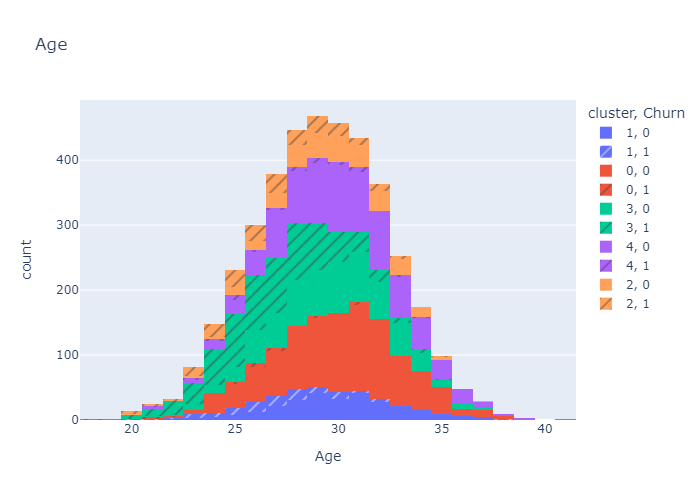

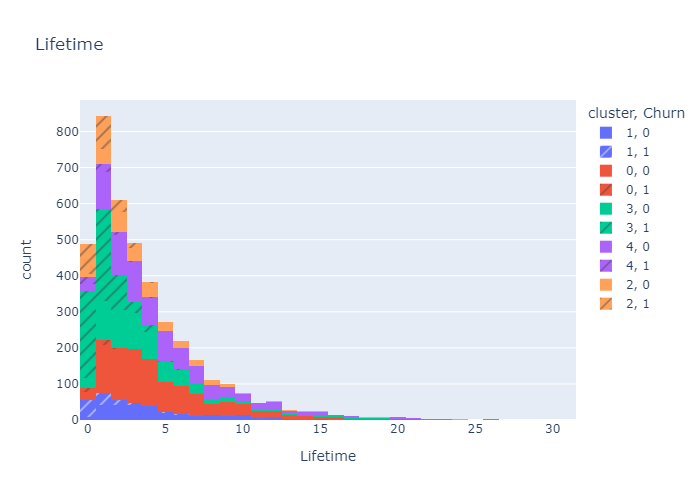

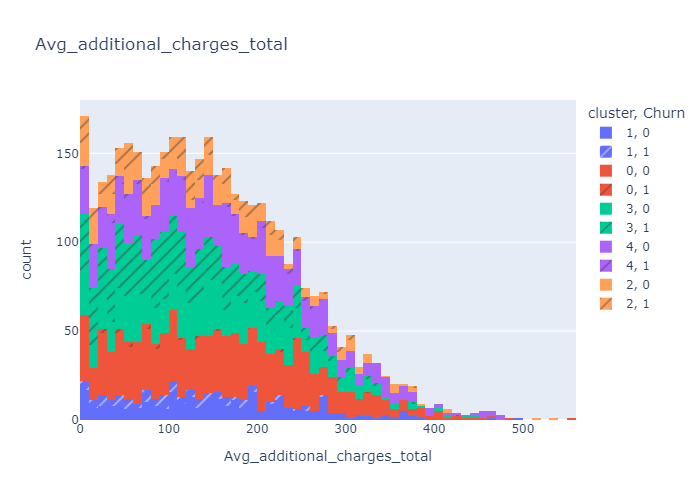

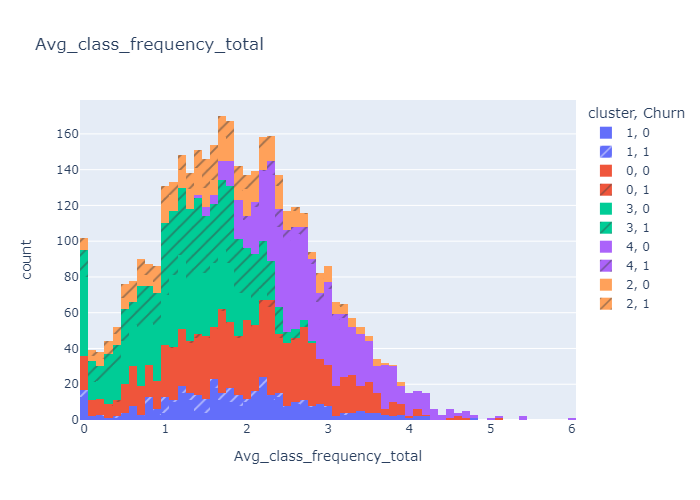

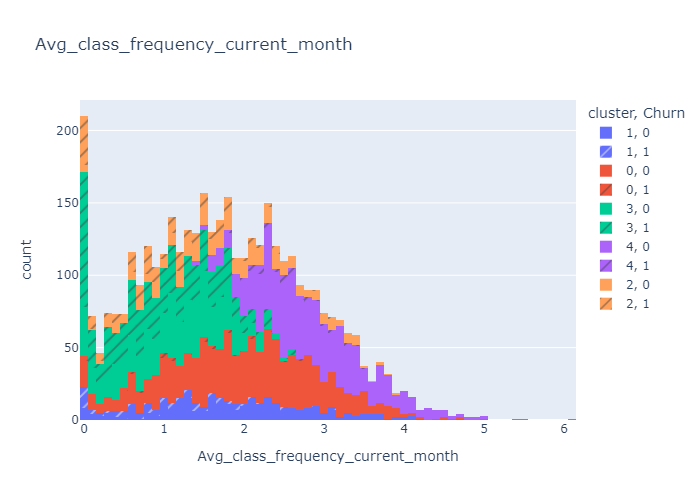

In [20]:
for i in features:
    distribution_cluster(i)

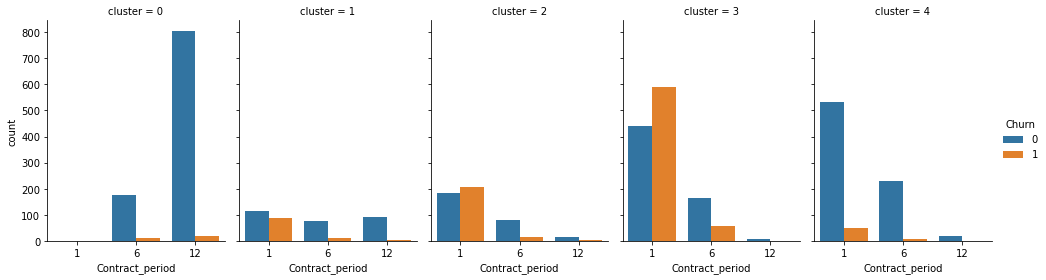

In [ ]:
for i in cat:
    bar_cluster(i)

#### Churn rate for each cluster 

In [ ]:
c_gym=gym[gym.Churn==1]
c_rate=c_gym.groupby(['cluster'])['Churn'].count().reset_index()
all_rate=gym.groupby(['cluster'])['Churn'].count().reset_index()
c_rate['churn rate %']=round(c_rate['Churn']/all_rate['Churn']*100,2)
c_rate.sort_values(by='churn rate %',ascending=False)

# Users clusters conclusion

When we Look at the mean feature values for clusters we can see that the 2 and mainly the 3 cluster has the lowest average values in any feature.

The distributions of features for the clusters are quite similar but we can see from the categorial features that the 2 and mainly 3 clusters are split quite similar between the groups of churn and non churn clients, while in the others clusters there are significantly more non churn clients. 

When we come to examine the churn rate for each cluster, unsurprisingly we can see that he churn rate of cluster 2 and 3 is the highest, what means that clients from this clusters are prone to leaving, while clients in clusters 0 and 4 are much more loyal.


# General conclusion: recommendations regarding the strategy for customer interaction and retention.

This report comes to analyze customer profiles, in order to come up with a customer retention strategy.

In this report we examine the data on two different groups: clients who left the Gym (churn), and clients who stayed.

After analyzing the data, we can draw conclusions and formulate recommendations regarding the strategy for customer interaction and retention.

1. Clients who stays loyal to gym most oftenly takes part in group sessions, originally signed up through a "bring a friend" 
   offer. out of that we need to enlarge our offered group sessions and advance our "bring a friend" offer to more clients.
   
2. Clients who stays loyal to gym are employees of a partner company who get discount, out of that we should enlarge the number 
   of companys who get discount.
   
3. We can see that the clients who left are younger (26.98 years Vs 29.97 years), have signifly less lifetime in the gym (0.99 
   years Vs 4.71 years), less time in contract time period (1.72 years Vs 5.74 years), and spending less time and money in the 
   gym (average of 1.47 visits Vs 2.02 visits and average additional charges of 115 dollars Vs 158 dollars).
   out of that we should address younger clients with special offers to increase the visits amount and continuity.  
   for example after three visits in a row get the fourth for free.
   
 As we can see those recommendations for better customer retention strategy could create more contarcts and longer ones, and  
 further more increase the additional charges in the GYM. all of that in order to increase the total revnue of the gym.